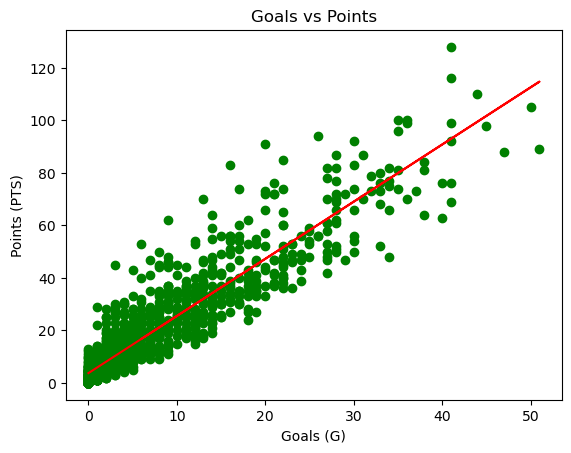

Linear Regression coefficient: 2.18
Intercept: 3.74


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

goals = df[['G']]
points = df['PTS']

lrgoals = LinearRegression()
lrgoals.fit(goals, points)

plt.scatter(goals, points, color='green', label='Points')
plt.plot(goals, lrgoals.predict(goals), color='red', label='Fit')
plt.xlabel('Goals (G)')
plt.ylabel('Points (PTS)')
plt.title('Goals vs Points')
plt.show()

print(f"Linear Regression coefficient: {lrgoals.coef_[0]:.2f}")
print(f"Intercept: {lrgoals.intercept_:.2f}")

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Sample data, i couldnt get the file to read.
data = {
    "Name": ["Tony Stark", "Steve Rogers", "Thor", "Bruce Banner", "Natasha", "Clint"],
    "Appearances": [3068, 2800, 2600, 2400, 2000, 1800],
    "Year": [1963, 1941, 1962, 1962, 1964, 1964],
    "Gender": ["MALE", "MALE", "MALE", "MALE", "FEMALE", "MALE"],
    "Death1": ["YES", "NO", "NO", "YES", "YES", "NO"]
}
df = pd.DataFrame(data)

df["Gender_enc"] = LabelEncoder().fit_transform(df["Gender"])
df["Death1"] = df["Death1"].map({"YES": 1, "NO": 0})

X = df[["Appearances", "Year", "Gender_enc"]]
y = df["Death1"]
model = LogisticRegression(max_iter=1000).fit(X, y)

tony = [[3068, 1963, 1]]
prob = model.predict_proba(tony)[0, 1]

print(f"Tony Stark probability of Death1: {prob:.2f}")


Tony Stark probability of Death1: 0.88


C:\Users\austi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


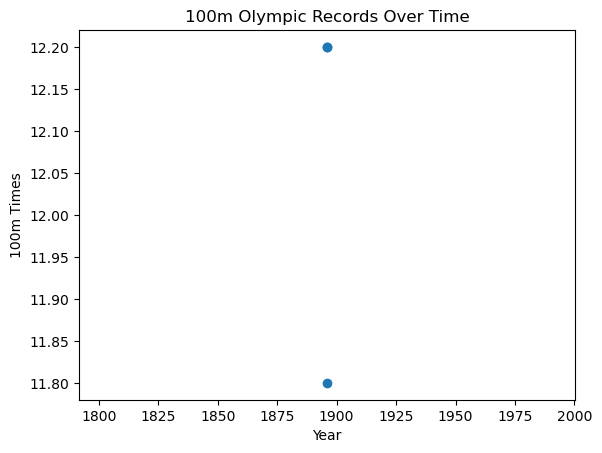

Predicted 100m time in 2024: 12.07s
Predicted 100m time in 2300: 12.07s


C:\Users\austi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\austi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Year'] = df['Date'].dt.year

X = df[['Year']]
y = df['Time']

lr100m = LinearRegression()
lr100m.fit(X, y)

plt.scatter(X, y, label='Actual Times')
plt.plot(X, lr100m.predict(X), color='red', label='Linear Fit')
plt.xlabel('Year')
plt.ylabel('100m Times')
plt.title('100m Olympic Records Over Time')
plt.show()

p2024 = lr100m.predict([[2024]])[0]
p2300 = lr100m.predict([[2300]])[0]

print(f"Predicted 100m time in 2024: {p2024:.2f}s")
print(f"Predicted 100m time in 2300: {p2300:.2f}s")
